In [1]:
import math
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import json
from scipy.stats import pearsonr
import re
import seaborn as sns

In [2]:
headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.87 Safari/537.36',
    }



In [105]:
#scrape fight data from hockeyfights
#dictionaries and lists for scraping
start_links = ['https://www.hockeyfights.com/fightlog/1/reg2020/1', 'https://www.hockeyfights.com/fightlog/1/reg2019/1', 'https://www.hockeyfights.com/fightlog/1/reg2018/1', 'https://www.hockeyfights.com/fightlog/1/reg2017/1', 'https://www.hockeyfights.com/fightlog/1/reg2016/1', 'https://www.hockeyfights.com/fightlog/1/reg2015/1', 'https://www.hockeyfights.com/fightlog/1/reg2014/1', 'https://www.hockeyfights.com/fightlog/1/reg2013/1', 'https://www.hockeyfights.com/fightlog/1/reg2012/1', 'https://www.hockeyfights.com/fightlog/1/reg2011/1']
years = ["2020", "2019", "2018", "2017", "2016", "2015", "2014", "2013", "2012", "2011"]
teams_dict = {'BOS': 'Boston Bruins', 'ANA': 'Anaheim Ducks', 'ARI': 'Arizona Coyotes', 'CAR': 'Carolina Hurricanes', 'BUF': 'Buffalo Sabres', 'CHI': 'Chicago Blackhawks', 'CAL': 'Calgary Flames', 'DAL': 'Dallas Stars', 'COL':'Colarado Avalanches', 'EDM':'Edmonton Oilers', 'NJD':'New Jersey Devils', 'NYI':'New York Islanders', 'CBJ': 'Columbus Blue Jackets','NYR':'New York Rangers','FLA':'Florida Panthers', 'MIN': 'Minnesota Wild', 'LAK': 'Los Angeles Kings', 'OTT': 'Ottawa Senators','DET':'Detroit Red Wings','MON':'Montréal Canadiens','PHI': 'Philadelphia Flyers', 'NSH':'Nashville Predators','PIT':'Pitsburgh Penguins','SJS':'San Jose Sharks','STL':'St. Louis Blues','TBL':'Tampa Bay Lightning', 'WAS':'Washington Capitals','VAN':'Vancouver Canucks','TOR':'Toronto Maple Leafs','WPG':'Winnipeg Jets'}

#lists for holding fight participants and winners
winner_list = []
fight_list = []
year_list = []

#Dicts for holding data and making dfs later
fights_dict= {}
fight_wins_dict = {}
year_fights = {"2020":0, "2019":0, "2018":0, "2017":0, "2016":0, "2015":0, "2014":0, "2013":0, "2012":0, "2011":0}
team_fight_totals = {'Boston Bruins':0, 'Anaheim Ducks':0, 'Arizona Coyotes':0, 'Carolina Hurricanes':0, 'Buffalo Sabres':0, 'Chicago Blackhawks':0, 'Calgary Flames':0, 'Dallas Stars':0, 'Colarado Avalanches':0, 'Edmonton Oilers':0, 'New Jersey Devils':0, 'New York Islanders':0, 'Columbus Blue Jackets':0, 'New York Rangers':0, 'Florida Panthers':0, 'Minnesota Wild':0, 'Los Angeles Kings':0, 'Ottawa Senators':0, 'Detroit Red Wings':0, 'Montréal Canadiens':0, 'Philadelphia Flyers':0, 'Nashville Predators':0, 'Pitsburgh Penguins':0, 'San Jose Sharks':0, 'St. Louis Blues':0, 'Tampa Bay Lightning':0, 'Washington Capitals':0, 'Vancouver Canucks':0, 'Toronto Maple Leafs':0, 'Winnipeg Jets':0}
team_fight_wins = {'Boston Bruins':0, 'Anaheim Ducks':0, 'Arizona Coyotes':0, 'Carolina Hurricanes':0, 'Buffalo Sabres':0, 'Chicago Blackhawks':0, 'Calgary Flames':0, 'Dallas Stars':0, 'Colarado Avalanches':0, 'Edmonton Oilers':0, 'New Jersey Devils':0, 'New York Islanders':0, 'Columbus Blue Jackets':0, 'New York Rangers':0, 'Florida Panthers':0, 'Minnesota Wild':0, 'Los Angeles Kings':0, 'Ottawa Senators':0, 'Detroit Red Wings':0, 'Montréal Canadiens':0, 'Philadelphia Flyers':0, 'Nashville Predators':0, 'Pitsburgh Penguins':0, 'San Jose Sharks':0, 'St. Louis Blues':0, 'Tampa Bay Lightning':0, 'Washington Capitals':0, 'Vancouver Canucks':0, 'Toronto Maple Leafs':0, 'Winnipeg Jets':0}


#For each season, loop through all fights on hockeyfights, determine who was in each fight, and count the fights in the fights_dict
year = 0
for link in start_links:
    data = requests.get(link, headers=headers).text
    soup = BeautifulSoup(data, 'html.parser')
    page_links_div =soup.find('div', {"class": "bottom fightlog-pagination"})
    a_list = page_links_div.find_all('a')
    for a in a_list:
        data = requests.get("https://www.hockeyfights.com" + a['href'], headers=headers).text
        soup = BeautifulSoup(data, 'html.parser')
        spans = soup.find_all('span', {"class": "players"})
        winners =soup.find_all('span', {"class": "status"})
        for span in spans:
            teams = re.findall('\(([^)]+)', span.text)
            fight_list.append(span.text)
            for team in teams:
                if team in teams_dict:
                    team_fight_totals[teams_dict[team]] = team_fight_totals[teams_dict[team]] + 1
                    name = teams_dict[team] + " " + years[year]
                    if name in fights_dict:
                        fights_dict[name] = fights_dict[name] +1
                    else:
                        fights_dict[name] = 1
                year_fights[years[year]] = year_fights[years[year]] + 1
        for winner in winners:
            words = winner.text.split(" ")
            winner_name = words[2] + " " + words[3]
            winner_list.append(winner_name)
            year_list.append(years[year])

    year = year+1
    
i = 0
for fight in fight_list:
    if "Draw" in winner_list[i]:
            i +=1
            continue
    winning_team = re.findall('\(([^)]+)', (fight.split(winner_list[i],1)[1]))[0]
    if winning_team in teams_dict:
        win_name = teams_dict[winning_team] + " " + year_list[i]
        team_fight_wins[teams_dict[winning_team]] += 1
    if win_name in fight_wins_dict:
        fight_wins_dict[win_name] = fight_wins_dict[win_name] +1
    else:
        fight_wins_dict[win_name] = 1
    i+=1

#Make dfs from dict with data
fights_df = pd.DataFrame.from_dict(fights_dict, orient='index',columns=['Fights'])

fights_year_df = pd.DataFrame.from_dict(year_fights, orient='index',columns=['Fights'])
fights_year_df.sort_values("Fights", ascending = False, inplace = True)

team_fights_df = pd.DataFrame.from_dict(team_fight_totals, orient='index',columns=['Fights'])
team_fights_df.sort_values("Fights", ascending = False, inplace = True)

fight_wins_df = pd.DataFrame.from_dict(fight_wins_dict, orient='index',columns=['Fight_wins'])
fight_wins_df.sort_values("Fight_wins", ascending = False, inplace = True)

team_fight_wins_df = pd.DataFrame.from_dict(team_fight_wins, orient='index',columns=['fight_wins'])
team_fight_wins_df.sort_values("fight_wins", ascending = False, inplace = True)

win_percent_df = pd.concat([team_fight_wins_df, team_fights_df], axis=1)
win_percent_df.dropna(inplace=True)
win_percent_df = win_percent_df.apply(pd.to_numeric)
win_percent_df['win%'] = (win_percent_df['fight_wins'] / win_percent_df['Fights']) * 100

win_percent_df.sort_values("win%", ascending = False, inplace = True)



In [106]:
#pull in team performance data from NHL api for 2011-2020
ids = ['1','2','3','4','5','6','7','8','9','10','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','28','29','30']
years = ['20192020', '20182019', '20172018', '20162017', '20152016', '20142015', '20132014', '20122013', '20112012', '20102011']


stats_df = pd.DataFrame(columns =['gamesPlayed', 'wins', 'losses', 'ot', 'pts', 'ptPctg', 'goalsPerGame', 'goalsAgainstPerGame', 'evGGARatio', 'powerPlayPercentage', 'powerPlayGoals', 'powerPlayGoalsAgainst', 'powerPlayOpportunities', 'penaltyKillPercentage', 'shotsPerGame', 'shotsAllowed', 'winScoreFirst', 'winOppScoreFirst', 'winLeadFirstPer', 'winLeadSecondPer', 'winOutshootOpp', 'winOutshotByOpp', 'faceOffsTaken', 'faceOffsWon', 'faceOffsLost', 'faceOffWinPercentage', 'shootingPctg', 'savePctg', 'Team'] )
for team in ids:
    for year in years:
        teams = requests.get('https://statsapi.web.nhl.com/api/v1/teams/' + team +'/?expand=team.stats&season='+year)

        team_name = teams.json()['teams'][0]['name']

        team_stats = teams.json()['teams'][0]['teamStats'][0]['splits'][0]['stat']

        team_stats['Team'] = team_name + " " + year[-4:]

        stats_df = stats_df.append(team_stats, ignore_index = True)

stats_df.set_index('Team', inplace = True)



In [107]:
#Join team stats dataframe and fights dataframe by team name (index)
combo_df = pd.concat([fights_df, stats_df], axis=1)
combo_df = pd.concat([combo_df, fight_wins_df], axis=1)
combo_df.dropna(inplace=True)
combo_df = combo_df.apply(pd.to_numeric)
combo_df.to_csv("combo.csv")

In [108]:
# Corr of above .5 or below -.5 represents notable correlation, p value below .05 suggests rejecting the null hypothesis that the two aren't related
def correlationTest (b):
    corr, p = pearsonr(combo_df['Fights'], b)
    if p <0.05:
        print ('corr ' + str(corr))
        print ('p ' + str(p))

In [109]:
for col in combo_df.columns:
    print(col)
    correlationTest(combo_df[col])

Fights
corr 1.0
p 0.0
gamesPlayed
corr 0.17089208304144804
p 0.005828862416648254
wins
losses
ot
pts
corr 0.12351158010455249
p 0.04706379554414119
ptPctg
goalsPerGame
corr -0.15263836902176364
p 0.013931446228194515
goalsAgainstPerGame
corr -0.1772094438004183
p 0.004225768904686431
evGGARatio
powerPlayPercentage
corr -0.17176039361527173
p 0.005580252063328922
powerPlayGoals
corr 0.15277162520348514
p 0.013847373214132588
powerPlayGoalsAgainst
corr 0.20127949381801574
p 0.0011259009839256107
powerPlayOpportunities
corr 0.38730973617701214
p 1.0695736745476496e-10
penaltyKillPercentage
corr 0.19405545452231898
p 0.001702197148669785
shotsPerGame
corr -0.18363001802130474
p 0.003014898982234988
shotsAllowed
winScoreFirst
winOppScoreFirst
winLeadFirstPer
winLeadSecondPer
winOutshootOpp
winOutshotByOpp
faceOffsTaken
corr 0.16074778691118066
p 0.009559994658215911
faceOffsWon
corr 0.1445950910386468
p 0.019910546190929714
faceOffsLost
corr 0.165272196895489
p 0.00769213975670191
faceOffWi

Text(0, 0.5, 'Faceoffs')

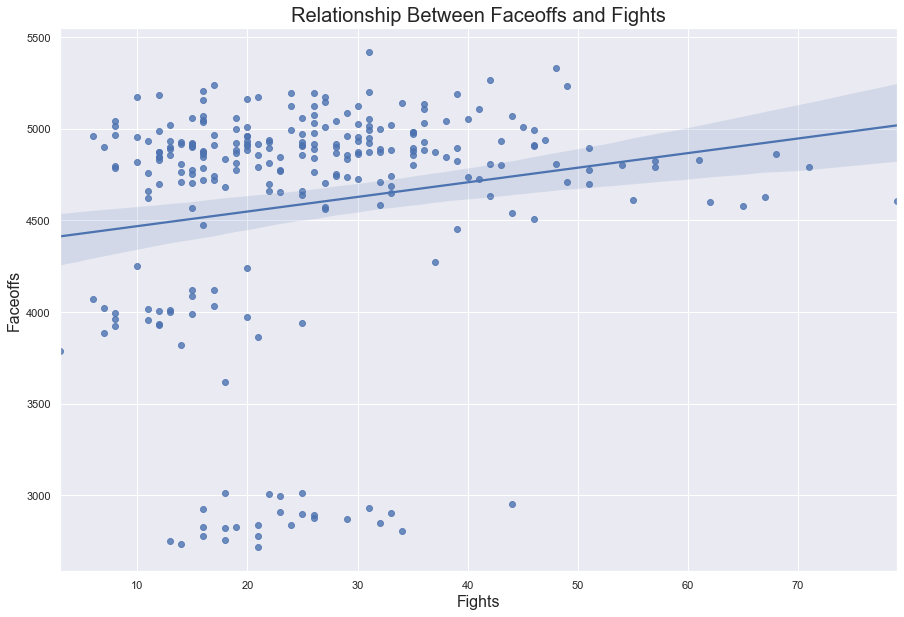

In [110]:
sns.regplot(x='Fights', y='faceOffsTaken', data=combo_df)
plt.title("Relationship Between Faceoffs and Fights", fontsize =20)
plt.xlabel("Fights", fontsize =16)
plt.ylabel("Faceoffs", fontsize =16)

Text(0, 0.5, 'Goals Against Per Game')

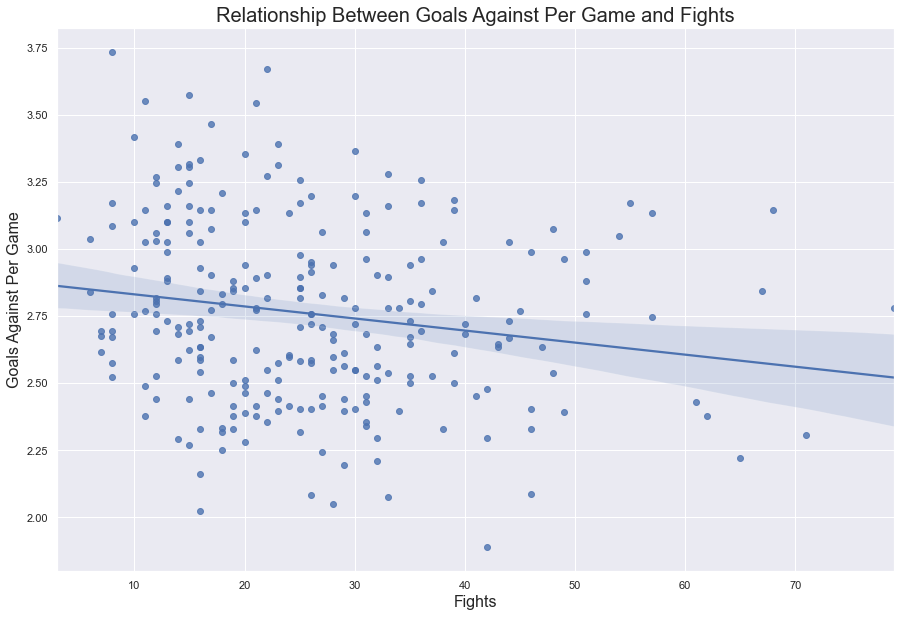

In [111]:
sns.regplot(x='Fights', y='goalsAgainstPerGame', data=combo_df)
plt.title("Relationship Between Goals Against Per Game and Fights", fontsize =20)
plt.xlabel("Fights", fontsize =16)
plt.ylabel("Goals Against Per Game", fontsize =16)

Text(0, 0.5, 'Goals Per Game')

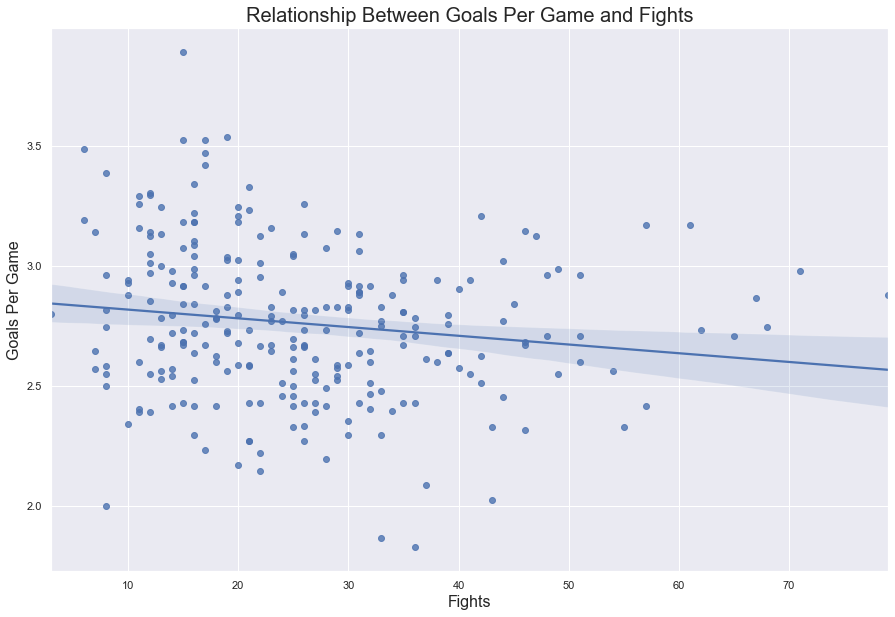

In [112]:
sns.regplot(x='Fights', y='goalsPerGame', data=combo_df)
plt.title("Relationship Between Goals Per Game and Fights", fontsize =20)
plt.xlabel("Fights", fontsize =16)
plt.ylabel("Goals Per Game", fontsize =16)

Text(0, 0.5, 'Save Percentage')

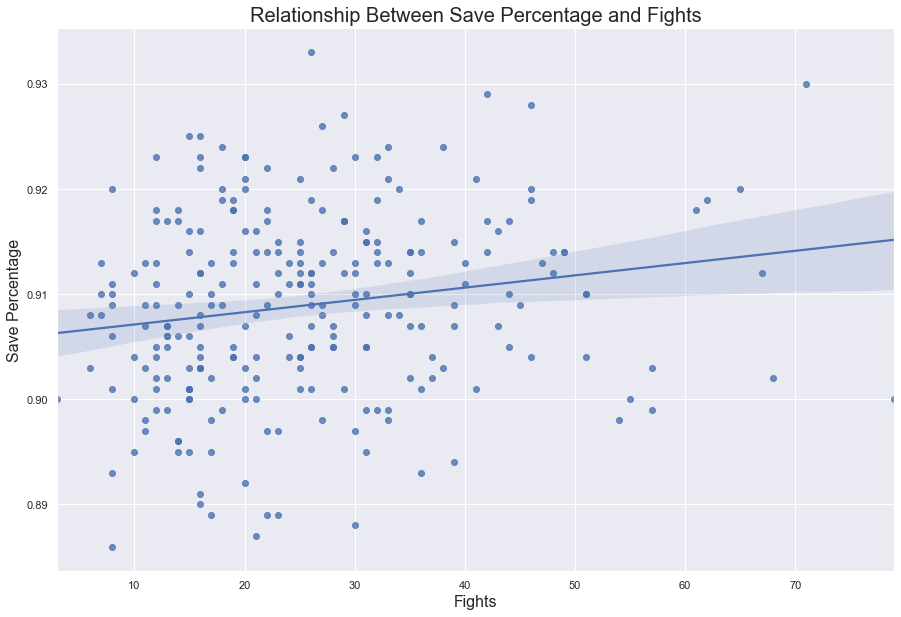

In [113]:
sns.regplot(x='Fights', y='savePctg', data=combo_df)
plt.title("Relationship Between Save Percentage and Fights", fontsize =20)
plt.xlabel("Fights", fontsize =16)
plt.ylabel("Save Percentage", fontsize =16)

Text(0, 0.5, 'Faceoffs')

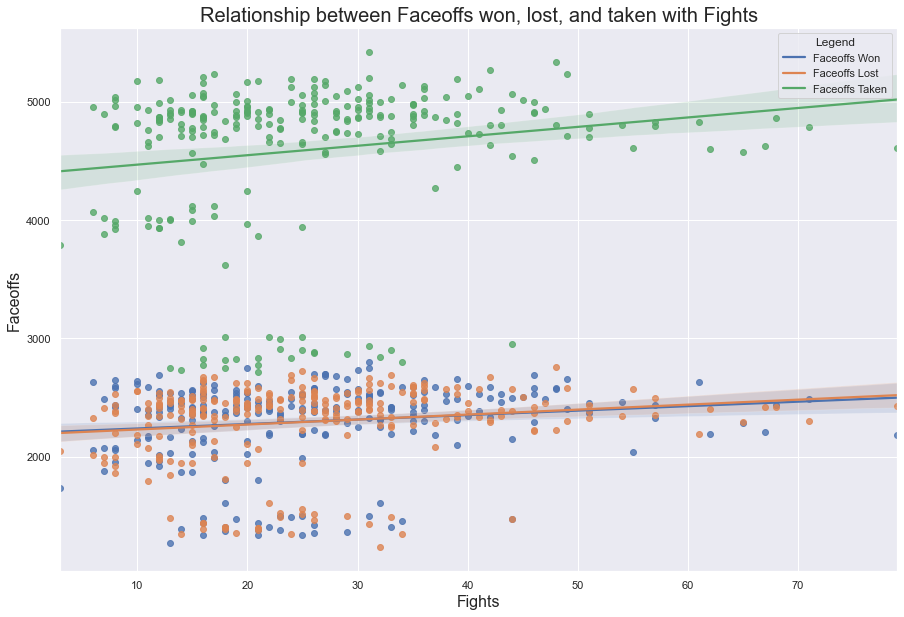

In [127]:
sns.regplot(x='Fights', y='faceOffsWon', data=combo_df)
sns.regplot(x='Fights', y='faceOffsLost', data=combo_df)
sns.regplot(x='Fights', y='faceOffsTaken', data=combo_df)
sns.set(rc={'figure.figsize':(15,10)})
plt.legend(labels=["Faceoffs Won","Faceoffs Lost", "Faceoffs Taken"], title = "Legend")
plt.title("Relationship between Faceoffs won, lost, and taken with Fights", fontsize =20)
plt.xlabel("Fights", fontsize =16)
plt.ylabel("Faceoffs", fontsize =16)

Text(0, 0.5, 'Power Play Percentage')

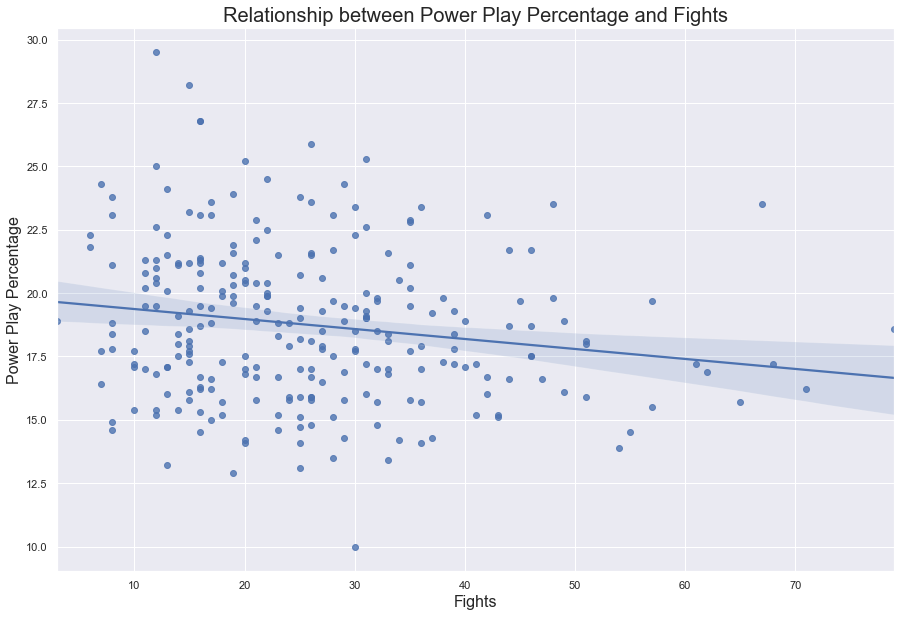

In [133]:
sns.regplot(x='Fights', y='powerPlayPercentage', data=combo_df)
sns.set(rc={'figure.figsize':(15,10)})
plt.title("Relationship between Power Play Percentage and Fights", fontsize =20)
plt.xlabel("Fights", fontsize =16)
plt.ylabel("Power Play Percentage", fontsize =16)

Text(0, 0.5, 'Penalty Kill Percentage')

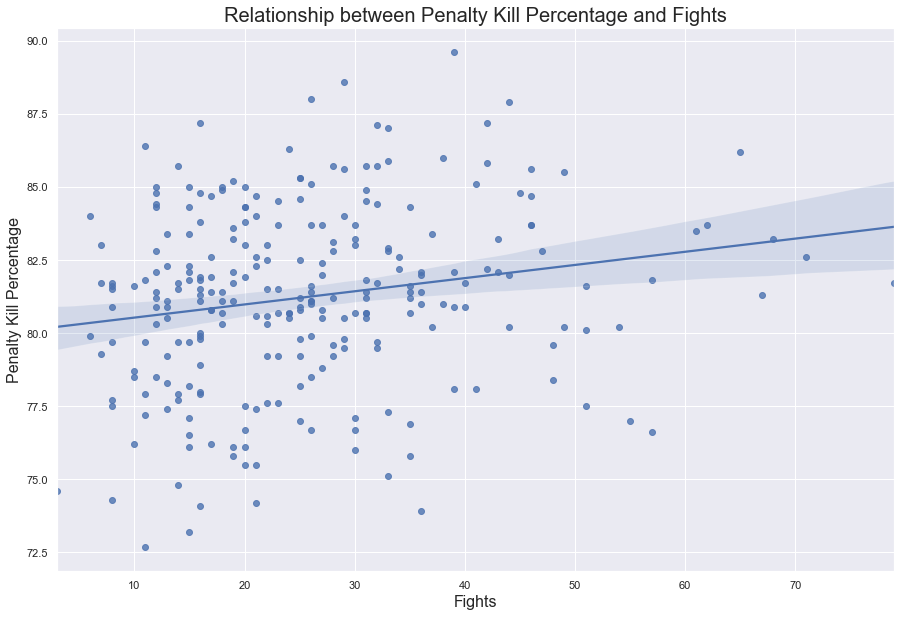

In [132]:
sns.regplot(x='Fights', y='penaltyKillPercentage', data=combo_df)
sns.set(rc={'figure.figsize':(15,10)})
plt.title("Relationship between Penalty Kill Percentage and Fights", fontsize =20)
plt.xlabel("Fights", fontsize =16)
plt.ylabel("Penalty Kill Percentage", fontsize =16)

Text(0, 0.5, 'Shots Per Game')

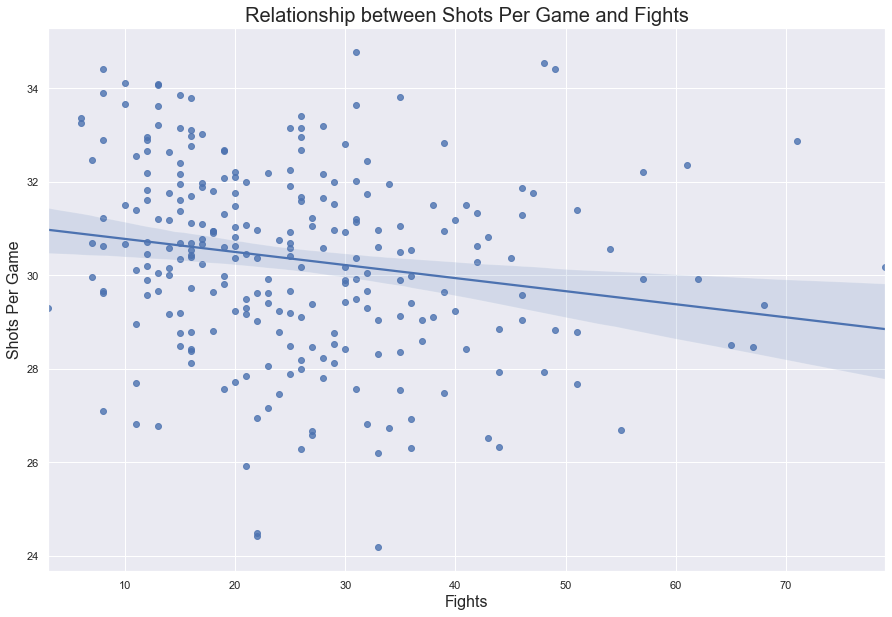

In [134]:
sns.regplot(x='Fights', y='shotsPerGame', data=combo_df)
sns.set(rc={'figure.figsize':(15,10)})
plt.title("Relationship between Shots Per Game and Fights", fontsize =20)
plt.xlabel("Fights", fontsize =16)
plt.ylabel("Shots Per Game", fontsize =16)

      Fights
2011    1290
2012    1092
2014     938
2015     782
2017     744
2013     694
2016     688
2018     560
2019     452
2020     390


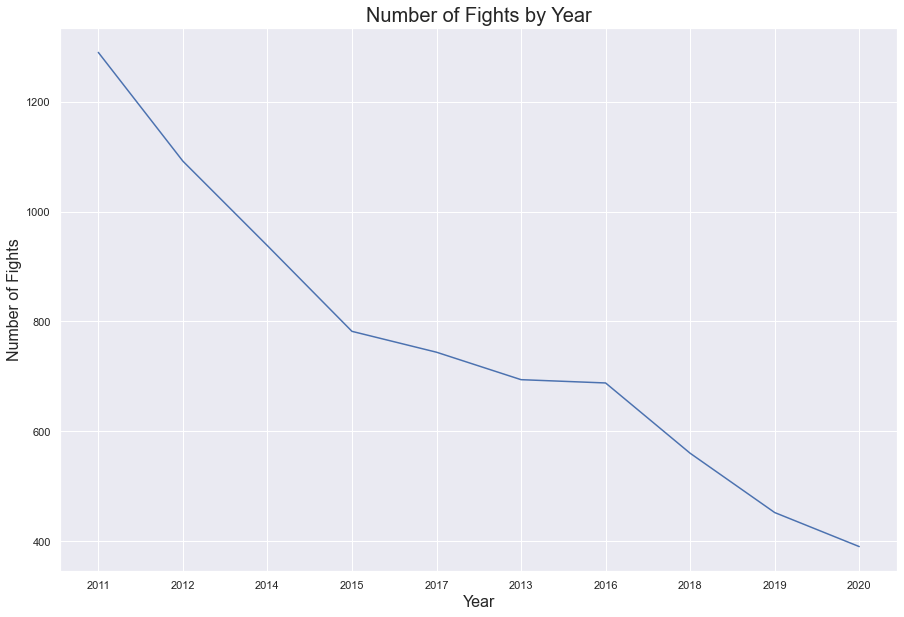

In [119]:
print(fights_year_df)
plt.plot(fights_year_df['Fights'])
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Fights', fontsize=16)
plt.title('Number of Fights by Year', fontsize=20)
plt.show()

Text(0.5, 1.0, 'Fights by Team from 2011 to 2020')

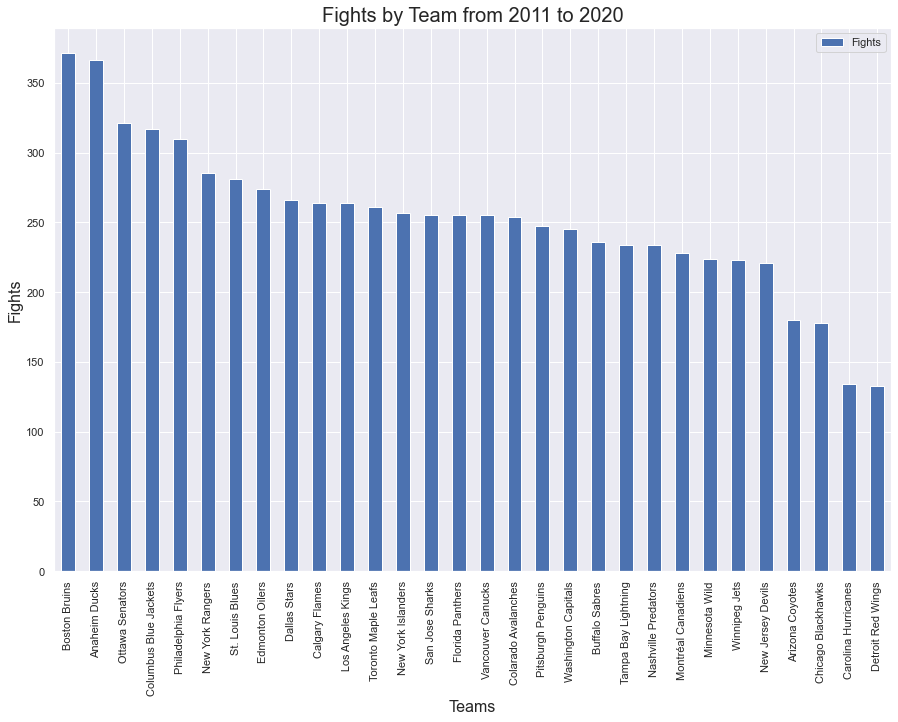

In [120]:
team_fights_df.plot(kind = "bar")
plt.xlabel('Teams', fontsize = 16)
plt.ylabel('Fights', fontsize = 16)
plt.title("Fights by Team from 2011 to 2020", fontsize = 20)


Text(0.5, 1.0, 'Fight Win Percentage by Team from 2011 to 2020')

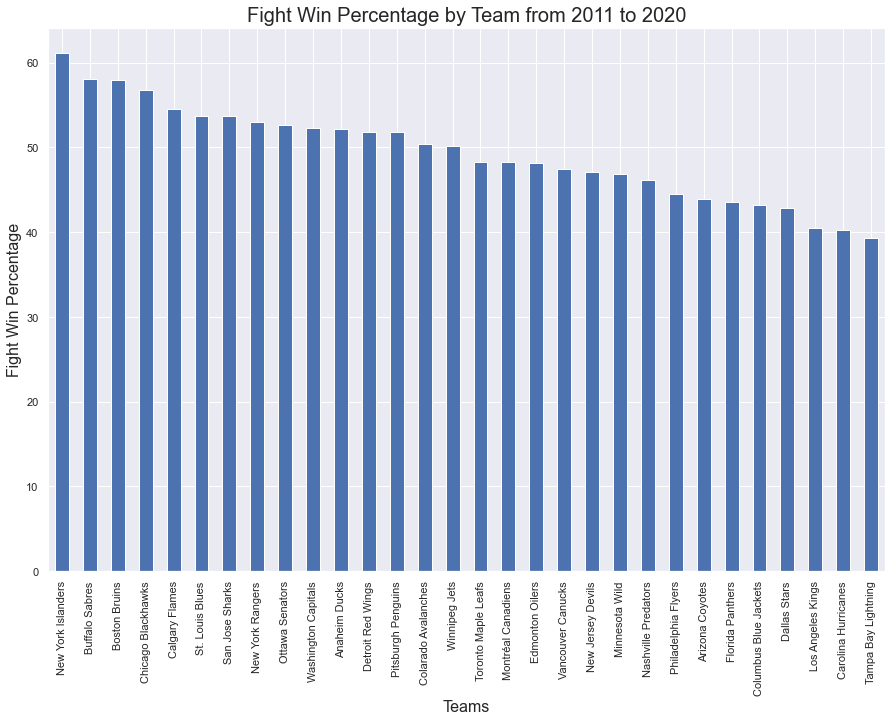

In [121]:
win_percent_df['win%'].plot(kind = "bar")
plt.xlabel('Teams', fontsize = 16)
plt.ylabel('Fight Win Percentage', fontsize = 16)
plt.title("Fight Win Percentage by Team from 2011 to 2020", fontsize = 20)
